<a href="https://colab.research.google.com/github/Royal92-prog/virus_test/blob/main/Major_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data loading and first observation

In [38]:
import pandas as pd
from google.colab import drive
import math
import numpy as np
from sklearn.model_selection import train_test_split

In [39]:
#Assume that the data is on the drive
drive.mount('/content/gdrive')
df= pd.read_csv('gdrive/My Drive/virus_data.csv')
df

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,patient_id,age,sex,weight,blood_type,address,current_location,job,num_of_siblings,happiness_score,...,PCR_04,PCR_05,PCR_06,PCR_07,PCR_08,PCR_09,PCR_10,risk,spread,covid
0,9454,26.0,M,109.9,O+,07791 Nelson Mountains Apt. 220\nLake Jennifer...,"('33.41012', '-91.06177')","Presenter, broadcasting",2.0,6.0,...,131.131165,8.0,17.146052,4.577239,3.157098,0.604181,6.0,High,Low,False
1,9657,16.0,F,34.7,A+,"748 Barnett Union\nBensonbury, NH 58511","('55.62047', '37.49338')",Print production planner,2.0,8.0,...,171.135863,3.0,1.891541,-9.881538,-1.315507,8.737819,4.0,High,Low,True
2,4658,14.0,M,57.1,AB+,"7424 Andrew Throughway\nEast Karina, IA 53085","('40.65538', '-74.38987')",NaN,2.0,9.0,...,85.790478,2.0,-1.619890,-4.069062,-1.184209,3.333429,3.0,Low,High,True
3,10495,5.0,M,25.8,A+,404 Christopher Prairie Suite 392\nSandersview...,"('32.5007', '-94.74049')",NaN,2.0,9.0,...,266.829714,4.0,4.849942,-18.282947,-1.470706,NaN,6.0,Low,Low,True
4,14475,10.0,F,38.4,B+,"1507 Gomez Creek Apt. 816\nBrandyville, MO 21265","('45.47885', '133.42825')",NaN,3.0,5.0,...,94.114375,2.0,-2.290169,-20.622331,NaN,-3.147700,6.0,Low,Low,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2496,10.0,F,31.3,B+,"890 Marquez Rue Apt. 584\nMaxwellchester, FL 7...","('-6.48167', '106.85417')",NaN,3.0,6.0,...,232.658869,1.0,-3.948926,NaN,-0.192454,7.365231,6.0,Low,Low,False
2996,7371,8.0,F,32.2,A+,"5921 Melissa Stream Apt. 436\nWest Joseph, VT ...","('41.55947', '14.66737')",NaN,2.0,9.0,...,120.771016,1.0,-5.621624,11.944807,10.101528,-1.817661,5.0,Low,Low,False
2997,11281,14.0,F,45.0,A+,NaN,"('-7.60361', '37.00438')",NaN,2.0,9.0,...,195.966114,0.0,-9.421494,-10.398387,-1.535022,3.563476,5.0,High,Low,True
2998,7124,8.0,F,36.1,A+,"8610 Michael Shore\nNorth Susanfort, AZ 64724","('32.65246', '51.67462')",NaN,2.0,7.0,...,24.662261,3.0,-0.555831,-4.352281,-2.155413,NaN,5.0,Low,Low,True


#Data Feature Analysis: Description and Types

In [40]:
import pandas as pd

data = {
    'feature': ['patient identifier', 'patient age', 'patient gender', 'patient weight',
                'patient blood type', 'patient address', 'current location', 'patient job',
                'number of siblings', 'happiness score', 'household income', 'pcr test date',
                'COVID-19 symptoms', 'conversations per day', 'sugar levels', 'sport activity'],
}

features_df = pd.DataFrame(data)

# Adding descriptions and types
features_df['description'] = [
    'Unique identifier for the patient',
    'Age of the patient in years',
    'Gender of the patient',
    'Weight of the patient in kg',
    'Blood type of the patient',
    'Address of the patient',
    'Location where the COVID-19 test has been taken',
    'Job of the patient',
    'Number of siblings the patient has',
    'Happiness score of the patient',
    'Family income of the patient',
    'Date of the PCR test',
    'COVID-19 related symptoms experienced by the patient prior to the test',
    'Number of daily conversations the patient has',
    'Sugar level in the patient\'s blood',
    'Weekly sessions of sport activity by the patient'
]

features_df['type'] = [
    'Categorical',
    'Categorical',
    'Categorical',
    'Continuous',
    'Categorical',
    'Other',
    'Other',
    'Other',
    'Categorical',
    'Categorical',
    'Continuous',
    'Ordinal',
    'Other',
    'Categorical',
    'Categorical',
    'Categorical'
]

# Adding entries for PCR parameters as rows
for i in range(1, 11):
    if i == 5 or i == 10:
        features_df.loc[len(features_df)] = [f'pcr_0{i}', f'PCR {i}th parameter result', 'Categorical']
    else:
        features_df.loc[len(features_df)] = [f'pcr_0{i}', f'PCR {i}th parameter result', 'Continuous']

features_df.reset_index(drop=True, inplace=True)

features_df


,feature,description,type
0,patient identifier,Unique identifier for the patient,Categorical
1,patient age,Age of the patient in years,Categorical
2,patient gender,Gender of the patient,Categorical
3,patient weight,Weight of the patient in kg,Continuous
4,patient blood type,Blood type of the patient,Categorical
5,patient address,Address of the patient,Other
6,current location,Location where the COVID-19 test has been taken,Other
7,patient job,Job of the patient,Other
8,number of siblings,Number of siblings the patient has,Categorical
9,happiness score,Happiness score of the patient,Categorical


In [41]:
#splitting the data into training and test sets
X_train,X_test= train_test_split(df,test_size=0.2,random_state=10,shuffle=False)

#Data cleaning and outlier detection

In [42]:
#converting all unique blood_types/symptoms to OHE features and removing blood_type feature
encoded_blood_types = pd.get_dummies(X_train['blood_type'])
encoded_symptoms = X_train['symptoms'].str.get_dummies(sep=';')
X_train = pd.concat([X_train.drop(['blood_type','symptoms'], axis = 1), encoded_blood_types,encoded_symptoms], axis=1)

# Extract separate features from the Address column using regular expressions
import re
pattern = r'(\d+)\s*([A-Za-z\s]+),\s*([A-Z]{2})\s*(\d+)$'
X_train[['zipAdd', 'street', 'state', 'zipcode']] = X_train['address'].str.extract(pattern)



In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

'''This operation generates histograms to visualize the distribution of each numerical feature in relation to three target features: covid, risk, and spread.
Each histogram represents the distribution of a specific numerical feature with respect to one of the target features.'''

forbidden = ["address", 'street', 'state', 'zipcode', 'job', 'zipAdd', 'symptoms', 'pcr_date', 'patient_id', 'current_location']
targets = ["risk", "spread", "covid"]

COLS = 3
ROWS = int(np.ceil((len(X_train.columns) - len(forbidden) - 3) / COLS))
#--- Remove Parentheses for Graph Plotting ---
'''
for target in targets:
    _, axes = plt.subplots(ROWS, COLS, figsize=(20, 5 * ROWS))
    for index, feature in enumerate(X_train.columns):
        if feature in forbidden or feature in targets:
            continue
        row = (index - len(forbidden)) // COLS
        col = (index - len(forbidden)) % COLS
        sns.histplot(ax=axes[row, col], data=X_train, x=feature, hue=target)
        axes[row, col].grid(alpha=0.5)

plt.tight_layout()
'''

'\nfor target in targets:\n    _, axes = plt.subplots(ROWS, COLS, figsize=(20, 5 * ROWS))\n    for index, feature in enumerate(X_train.columns):\n        if feature in forbidden or feature in targets:\n            continue\n        row = (index - len(forbidden)) // COLS\n        col = (index - len(forbidden)) % COLS\n        sns.histplot(ax=axes[row, col], data=X_train, x=feature, hue=target)\n        axes[row, col].grid(alpha=0.5)\n\nplt.tight_layout()\n'

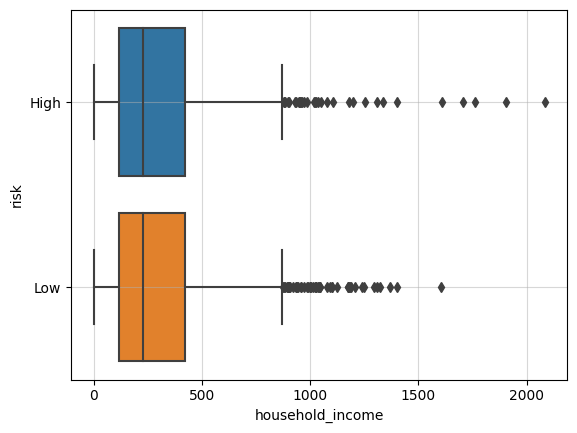

In [44]:
#A box plot of household_income by the risk label. inspecting outliers informativity.
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x="household_income",y="risk",data = X_train)
plt.grid(alpha=0.5)

In [45]:
#Replaces all negative values in the discrete_features columns of the X_train with nan
discrete_features = ["sugar_levels","sport_activity","weight","num_of_siblings","happiness_score","conversations_per_day"]
X_train[discrete_features] = X_train[discrete_features].where(X_train[discrete_features] >= 0, np.nan)

#Setting weight outliers for each age groups under 10
X_train.loc[X_train["age"] <= 9, "weight"] = X_train.loc[X_train["age"] <= 9, "weight"].apply(lambda x: 0.65 * x if x > 5 else 0.3 * x)

#outliers pairs cleaning implementation,graphs printings are for self analysis
relations = [["age", ['weight', 'sugar_levels'], 1.5], ['sugar_levels', ['weight'], 1.5]]

for relation in relations:
    feature = relation[0]
    related_features = relation[1]
    threshold = relation[2]

    for related_feature in related_features:
        q1 = X_train[feature].quantile(0.25)
        q3 = X_train[feature].quantile(0.75)
        iqr = q3 - q1

        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr

        X_train.loc[(X_train[feature] < lower_bound) | (X_train[feature] > upper_bound), related_feature] = np.nan

#Cleaning all PCR outliers of problematic dates
import datetime
PCRS=['PCR_01','PCR_02','PCR_03','PCR_04','PCR_05','PCR_06','PCR_07','PCR_08','PCR_09','PCR_10']

#Most results are outliers between these dates
date_start = datetime.datetime(2020, 5, 22)
date_end = datetime.datetime(2020, 6, 8)
X_train["pcr_date"] = pd.to_datetime(X_train["pcr_date"])

X_train.loc[(X_train["pcr_date"] >= date_start) & (X_train["pcr_date"] <= date_end), PCRS] = np.nan


#Data imputation

In [46]:
#Replace all nan values with random num in (0,9)
from random import randrange
import random
X_train["num_of_siblings"] = X_train["num_of_siblings"].fillna(randrange(0, 9))

# age median imputation
X_train["age"].fillna(X_train["age"].median(), inplace=True)

def imputePerAgeGroup(trainDf, string):
    trainDf[string].fillna(trainDf.groupby("age")[string].transform("median"), inplace=True)
    return trainDf

def imputeMedian(trainDf, string):
    trainDf[string].fillna(trainDf[string].median(), inplace=True)
    return trainDf

X_train = imputePerAgeGroup(X_train, "sugar_levels")
X_train = imputePerAgeGroup(X_train, "weight")
X_train = imputeMedian(X_train, "happiness_score")
X_train = imputeMedian(X_train, "conversations_per_day")
X_train = imputeMedian(X_train, "household_income")
X_train = imputeMedian(X_train, "sport_activity")

# sex - random sample imputation
X_train.loc[(X_train["sex"] != 'M') & (X_train["sex"] != 'F'), "sex"] = X_train.loc[(X_train["sex"] != 'M') & (X_train["sex"] != 'F'), "sex"].apply(lambda x: random.choice(['M', 'F']))

#State code Random imputation
def random_sample_imputation(df, column, unique_values):
    missing_indices = df.loc[df[column].isnull() | (df[column] == ''), column].index
    if len(unique_values) > 0:
        df.loc[missing_indices, column] = random.choice(unique_values)
    return df

X_train = random_sample_imputation(X_train, "state", X_train.loc[(X_train["state"].notnull()) & (X_train["state"] != ''), "state"].unique())
X_train = random_sample_imputation(X_train, "pcr_date", X_train.loc[(X_train["pcr_date"].notnull()) & (X_train["pcr_date"] != ''), "pcr_date"].unique())
X_train = random_sample_imputation(X_train, "zipAdd", X_train.loc[(X_train["zipAdd"].notnull()) & (X_train["zipAdd"] != ''), "zipAdd"].unique())

#missingImputation of All pcr's  by median sample method
for i in PCRS:
    X_train[i].fillna(X_train[i].median(), inplace=True)


#Features analysis and selection
Please refer to the Feature Selection Report for detailed information on the analysis conducted to choose a finite subset of features.

<ipython-input-47-23f05d754c4c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(X_train.corr(),fignum= f.number)


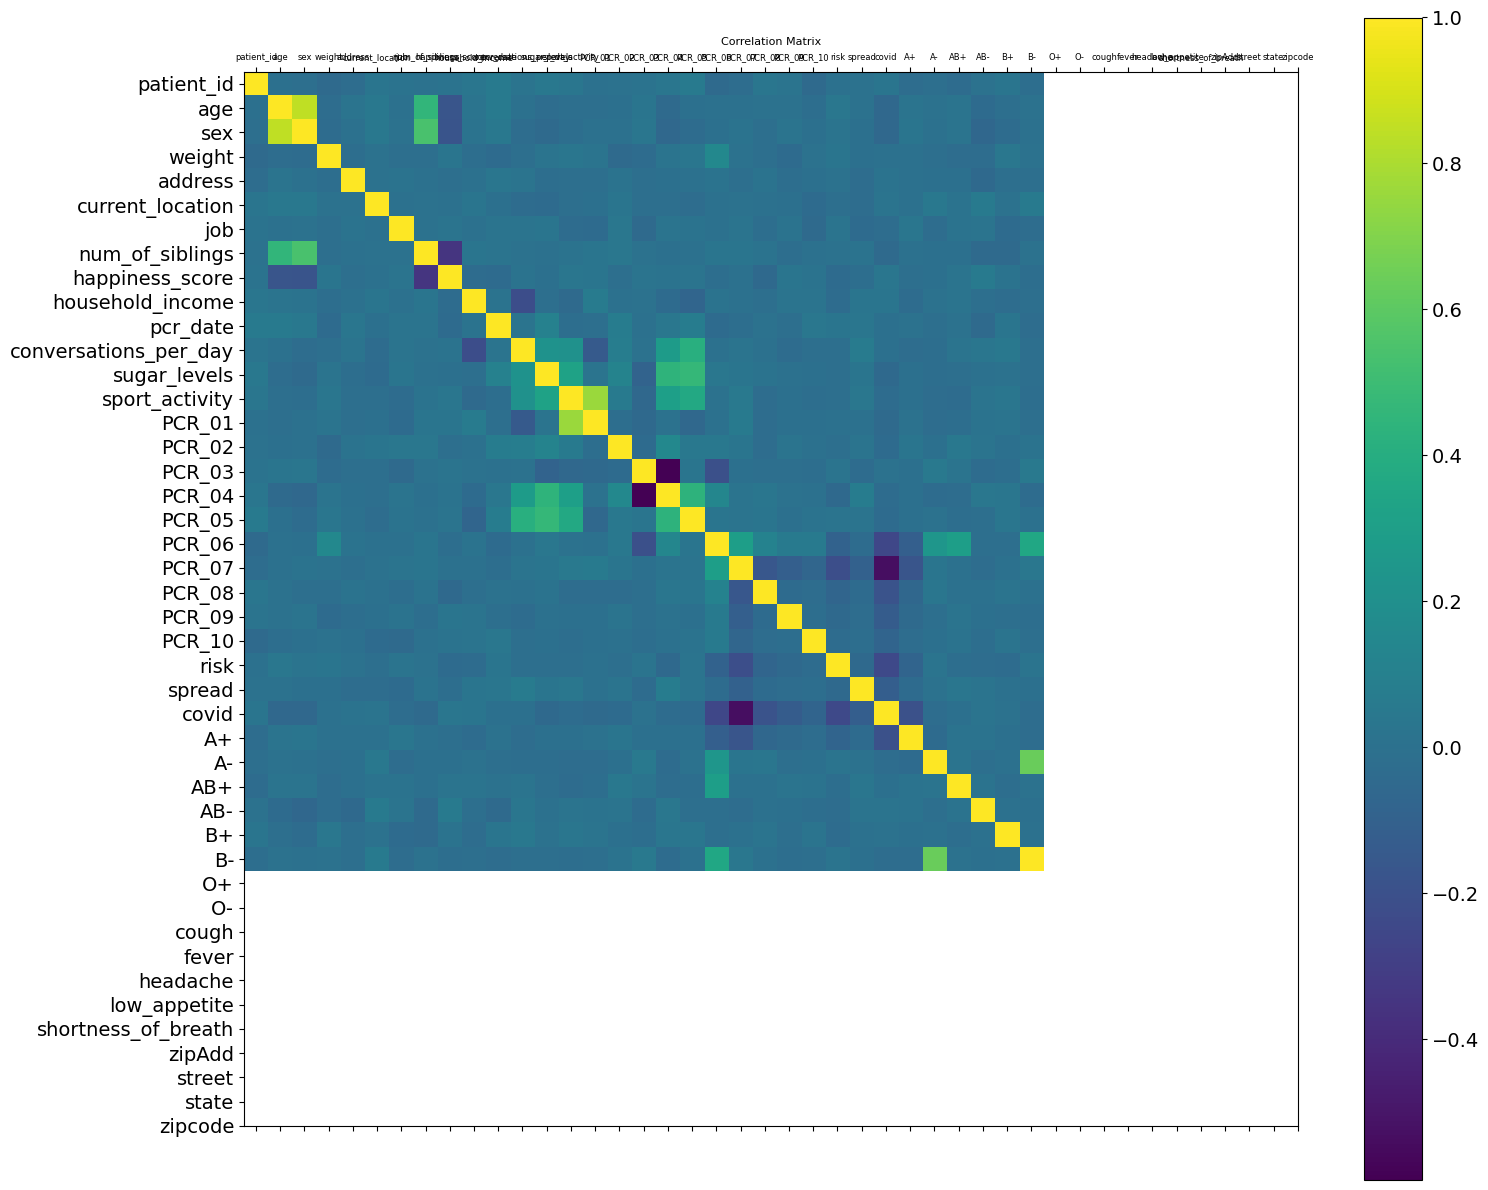

In [47]:
#Heat map
f = plt.figure(figsize=(17, 15))
plt.matshow(X_train.corr(),fignum= f.number)
plt.xticks(range(len(X_train.columns)),X_train.columns, fontsize=6)
plt.yticks(range(len(X_train.columns)), X_train.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=8);
plt.show()

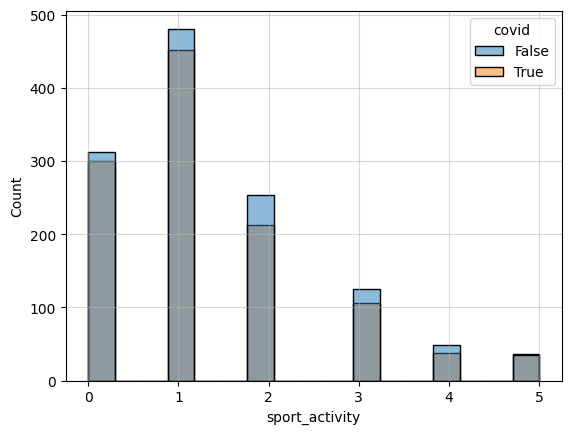

In [48]:
#
sns.histplot(data=X_train ,x = 'sport_activity' ,hue="covid")
plt.grid(alpha=0.5)


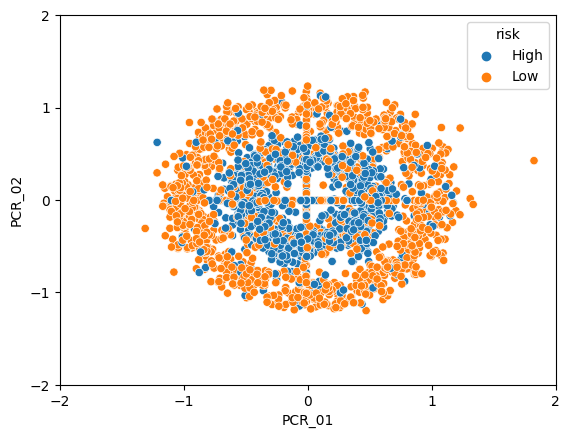

In [49]:
import seaborn as sns

x_values = [-2, -1, 0, 1, 2]
y_values = [-2, -1, 0, 1, 2]

filtered_data = X_train[
    (X_train["PCR_01"].between(min(x_values), max(x_values))) &
    (X_train["PCR_02"].between(min(y_values), max(y_values)))
]

sns.scatterplot(data=filtered_data, x="PCR_01", y="PCR_02", hue="risk")
plt.xticks(x_values)
plt.yticks(y_values)
plt.show()


In [50]:
#converting all target labels and sex into numerical
X_train["sex"].replace("M",np.float64(0),inplace = True)
X_train["sex"].replace("F",np.float64(1),inplace = True)
X_train["risk"].replace("Low",np.float64(0),inplace = True)
X_train["risk"].replace("High",np.float64(1),inplace = True)
X_train["spread"].replace("High",np.float64(1),inplace = True)
X_train["spread"].replace("Low",np.float64(0),inplace = True)
X_train["covid"] = X_train["covid"].astype(int)
X_train["risk"] = X_train["risk"].astype(int)
X_train["spread"] = X_train["spread"].astype(int)

#dropping all uninformative features:
X_train.drop(columns=[
    "patient_id",
    "PCR_06","street","zipcode","state",
    "current_location","address","job",
    "happiness_score","household_income",
    "sex","zipAdd","pcr_date"]
    ,inplace = True)
